# Compare MaSIF seed search results
Author: Max Jansen.
03-02-2022

## Goal and description
This is a simple notebook to compare the output from MaSIF seed search.
The main goal is to determine which proteins are most likely to bind to each other.
It is an all-vs-all comparison, with one list of human saliva proteins and another list of plant proteins that are expected to contribute to an astrigent sensation/taste.

It involves a binder list (human proteins) and a target list (plant proteins).
To get the raw data, one target protein was docked at a time against all possible binder proteins.
We are not most interested in the human saliva proteins, but rather in the plant proteins that either bind to many human binder *or* are predicted to bind strongly to a single binder.

We will mostly rely on one variable: The descriptor distance score. This score and other variables can be loaded from a score-file. There is one score-file per binder-targer pair in a specific pose (hence, a given binder-target pair can have multiple scores in case of multiple docking poses).

Afterwards, one can visualize the docking "poses" that have the highest predicted score.

In [1]:
# Import packages
import os
import argparse
import time
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from pathlib import Path

In [2]:
# Function to individual files
def read_scoref(path):
    target = str(path).split('/')[3]
    t_site = str(path).split('/')[4]
    t_site = t_site.split('_')[1]
    file = open(path, 'r')
    line = file.readlines()[0]
    line = line.split('\n')[0]
    ls = line.split(',')
    #ls = ls.append(target)
    return ls, target, t_site

In [3]:
# Load raw data and scores
data_dir = Path('../Data/Feb_dock/')
long_ls = []
for filepath in data_dir.glob("*/*/*/*.score"):
    x,y,z = read_scoref(filepath)
    long_ls.append(x + [y] + [z])

In [4]:
# Create df from lists
df = pd.DataFrame(long_ls, columns=['Binder', 'Point id', 'NN Score', 'Clashing ca', 'Clashing heavy'
                                    , 'Desc dist score', 'Target', 'Target site'])

# Clean up values in df cells to allow for sorting later, also convert to float
df['Binder'] = df['Binder'].str.replace("name: ","")
df['Binder'] = df['Binder'].str.replace("_"," ")
df['Binder'] = df['Binder'].str[:-1]
df['Point id'] = df['Point id'].str.replace("point id: ","")
df['NN Score'] = df['NN Score'].str.replace("score: ","")
df['Clashing ca'] = df['Clashing ca'].str.replace("clashing_ca: ","")
df['Clashing heavy'] = df['Clashing heavy'].str.replace("clashing_heavy: ","")
df['Desc dist score'] = df['Desc dist score'].str.replace("desc_dist_score: ","")

# Set the appropriate columns to numeric
cols = ['NN Score', 'Clashing ca', 'Clashing heavy', 'Desc dist score']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [5]:
pd.set_option('display.max_rows', 500)

In [6]:
df.sort_values(by=['Desc dist score'], ascending = False)

,Binder,Point id,NN Score,Clashing ca,Clashing heavy,Desc dist score,Target,Target site
201,1K8U A,0,0.7206,0.0,1.0,34.093159,LE01_A,4
230,1T7V A,36,0.9015,0.0,1.0,29.047359,1PBI_AB,3
282,CY02 A,9,0.0473,0.0,4.0,26.396051,LE02_A,5
132,CY02 A,45,0.0580,0.0,5.0,26.018966,DE02_A,1
106,1K8U A,5,0.0009,0.0,5.0,25.738708,DE02_A,0
160,1T7V A,25,0.5880,0.0,5.0,25.208631,AL01_A,9
0,1T7V A,16,0.1081,0.0,3.0,25.162350,DE01_A,7
49,1A4J AB,7,0.1574,0.0,5.0,24.181947,1P8B_A,3
13,CY03 A,14,0.0696,0.0,5.0,24.161970,1PNB_AB,0
197,1K8U A,16,0.0031,0.0,2.0,24.052275,LE01_A,3


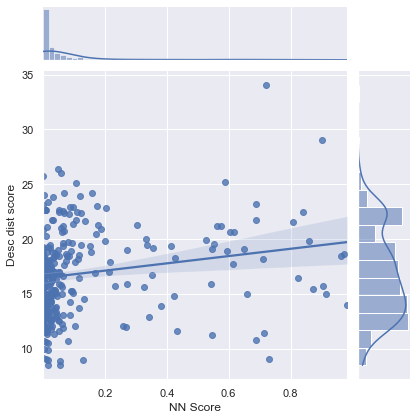

In [13]:
sns.jointplot(data=df, x="NN Score", y="Desc dist score", kind="reg")

<AxesSubplot:xlabel='NN Score', ylabel='Desc dist score'>

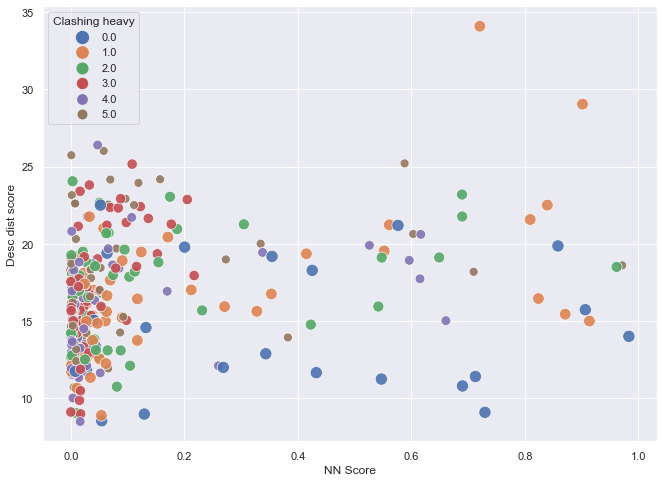

In [32]:
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(data=df, x="NN Score", y="Desc dist score", hue="Clashing heavy", 
                palette="deep", size ="Clashing heavy", sizes=(150, 80), alpha=0.9)


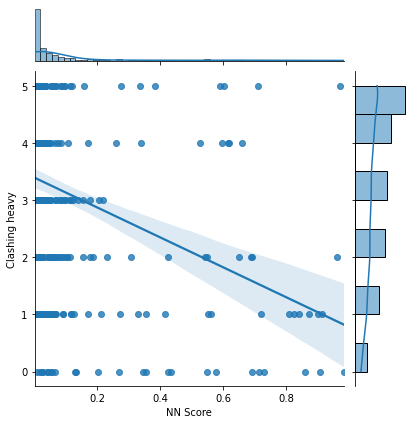

In [8]:
sns.jointplot(data=df, x="NN Score", y="Clashing heavy", kind="reg")

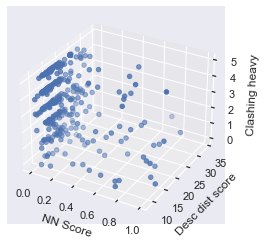

In [9]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['NN Score']
y = df['Desc dist score']
z = df['Clashing heavy']

ax.set_xlabel("NN Score")
ax.set_ylabel("Desc dist score")
ax.set_zlabel("Clashing heavy")
ax.scatter(x, y, z)

plt.show()